In [4]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
#we need to import dataset by their memory location 
df=pd.read_csv('car.csv')

In [6]:
#to check dataset loaded 
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
#to check the shape of dataset
df.shape

(7253, 14)

In [8]:
#to check missing value
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [9]:
#to check null values in percentage
df.isnull().sum()/len(df)*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [10]:
#to check datatype of column and non-null vaues
#so easier for to do the operations on them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [11]:
#to check how many unique value in dataset
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [12]:
#to take random sample 
df.sample(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4318,4318,Toyota Innova Crysta 2.8 ZX AT,Ahmedabad,2016,42388,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,24.63 Lakh,18.0
1846,1846,Toyota Innova 2.5 GX (Diesel) 7 Seater,Pune,2013,255000,Diesel,Manual,Third,12.99 kmpl,2494 CC,100.6 bhp,7.0,NaN,6.5


In [13]:
#for statistical summary
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [14]:
#to check the columns name
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

# feature engineering


In [15]:
#we do some feature engineering here
#like in given dataset there no information about a car age
#so we subrtact year of today to the year of purchase of car


In [16]:

from datetime import date
date.today().year
df['Car_age']=date.today().year-df['Year']


In [17]:
df.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8


In [18]:
#if you see new column is added into the dataset

In [19]:
#if you see in dataset the name_column contain both brand name and model
#so we need to seprate make them seprate column 1st one is brand and 2nd one is model


In [20]:
#so create the 1st column as brand
df['Brand']=df.Name.str.split().str.get(0)

In [21]:
df.sample(1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand
6844,6844,Hyundai i20 Asta 1.2,Mumbai,2015,17000,Petrol,Manual,First,18.6 kmpl,1197 CC,81.83 bhp,5.0,NaN,NaN,8,Hyundai


In [22]:
#if you in that dataset brand column is added

In [23]:
#so now we create new model column
df['Model']=df.Name.str.split().str.get(1)+ df.Name.str.split().str.get(2)

In [24]:
df.sample(1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93,19,Hyundai,SantroLP


In [25]:
#if you both the column are added 
#so now there is no need of column Name
df.drop(['Name'],axis=1,inplace=True)

In [26]:
df.sample(1)

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
1949,1949,Bangalore,2014,66000,Diesel,Manual,First,15.3 kmpl,2956 CC,83.8 bhp,7.0,NaN,4.45,9,Tata,SumoEX


In [27]:
#if you see the column Name is deleted

In [28]:
#from the year column we get the information about the car age so 
#there is no need of Year column anymore 
#so delete it
df.drop(['Year'],axis=1,inplace=True)

In [29]:
#if you see the brand column trere is some short name of brand 
#also brand name are capitalize
#if we see 'a' and "A " have diffrent meaning according to python so
#we can replace them

df["Brand"].replace({"ISUZU":"isuzu","mini":"mini cooper","Land":"Land rover"},inplace=True)

In [34]:
cat_col=df.select_dtypes(include=['object']).columns
num_colu=df.select_dtypes(exclude=['object']).columns
print(cat_col)

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage',
       'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')


In [31]:
df['Price'].skew()

3.3352319876668415

skew: 0.0


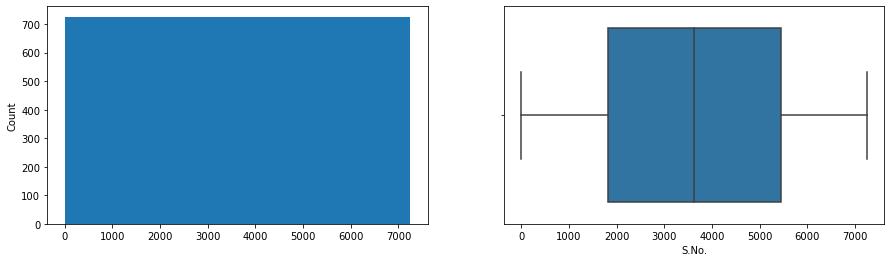

skew: 61.58


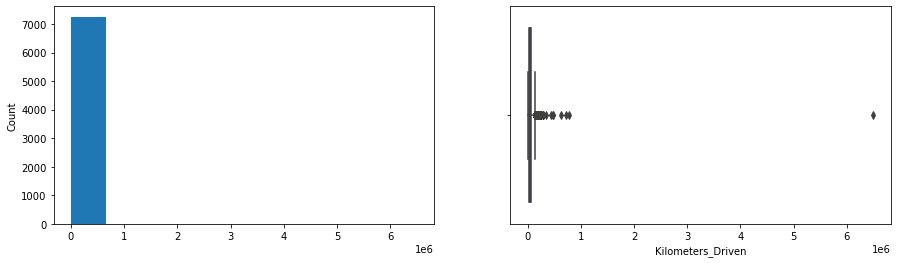

skew: 1.9


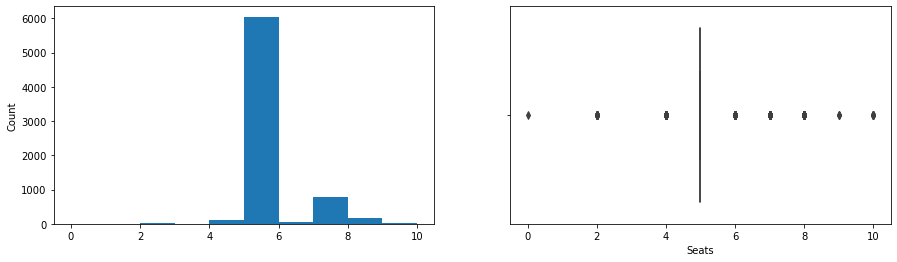

skew: 3.34


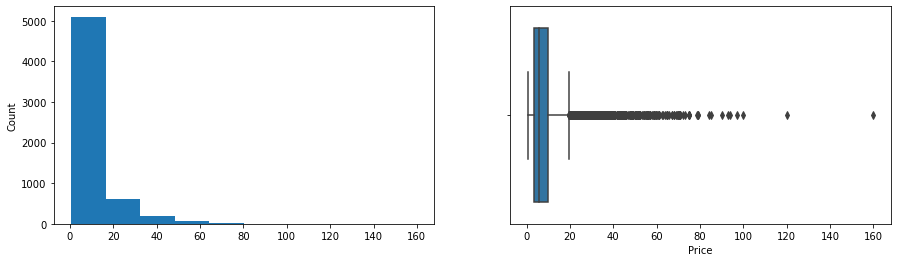

skew: 0.84


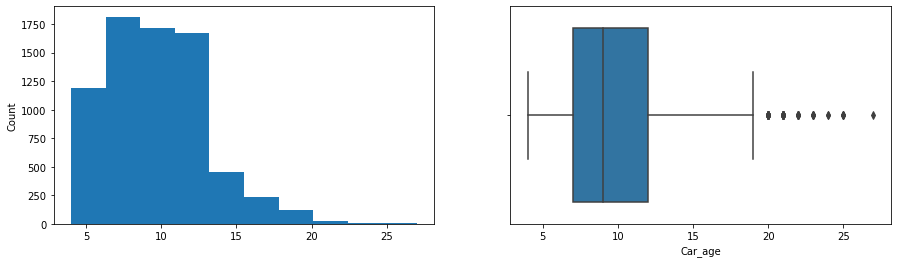

In [33]:
for cat_col in num_colu:
    print('skew:',round(df[cat_col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[cat_col].hist(grid=False)
    plt.ylabel('Count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[cat_col])
    plt.show()

In [42]:
df.sample(1)

,S.No.,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
3468,3468,Kochi,48031,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,4.98,9,Hyundai,Grandi10


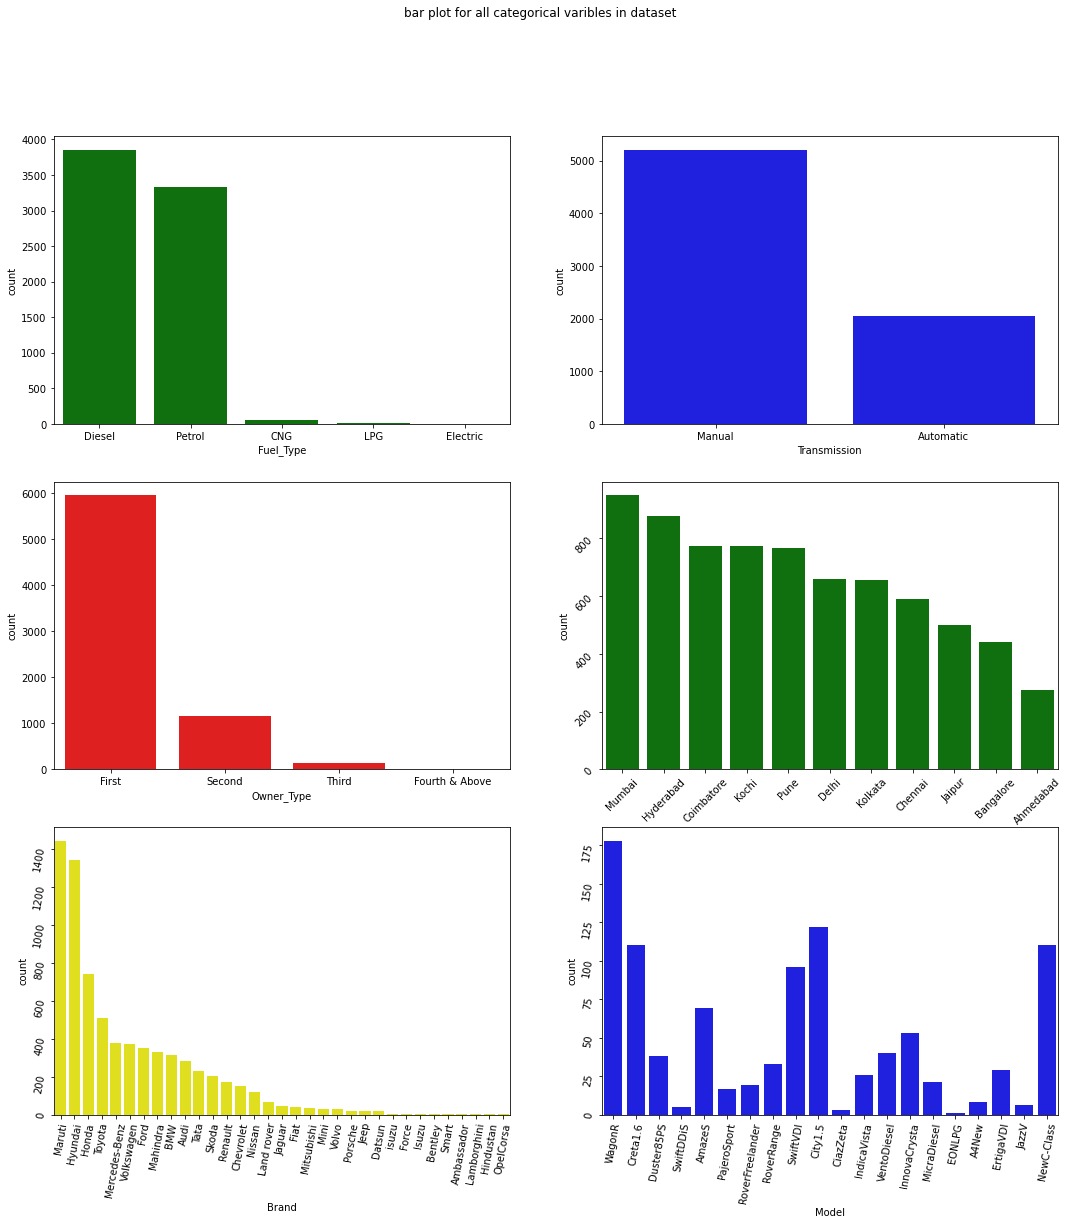

In [67]:
fig,axes=plt.subplots(3,2,figsize=(18,18))
fig.suptitle('bar plot for all categorical varibles in dataset')
sns.countplot(ax=axes[0,0],x='Fuel_Type',data=df,color ='Green',
    order=df['Fuel_Type'].value_counts().index)
sns.countplot(ax=axes[0,1],x='Transmission',data=df,color='blue',
             order=df['Transmission'].value_counts().index)
    
sns.countplot(ax=axes[1,0],x='Owner_Type',data=df,color='red',
              order=df['Owner_Type'].value_counts().index)
sns.countplot(ax=axes[2,0],x='Brand',data=df,color='yellow',
             order=df["Brand"].value_counts().index)
sns.countplot(ax=axes[1,1],x='Location',data=df,color='Green',
             order=df['Location'].value_counts().index)
sns.countplot(ax=axes[2,1],x='Model',data=df,color='blue',
             order=df['Model'].head(20).value_counts().index)

axes[1][1].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=80)
axes[2][1].tick_params(labelrotation=80)